In [1]:
import numpy as np
import pandas as pd 

#导入处理分类特征的库
from sklearn.preprocessing import LabelEncoder

#防止对运行没有影响的报错信息出现
import warnings
warnings.filterwarnings('ignore')

# 导入绘图库
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#导入训练数据
app_train = pd.read_csv(r'D:\datasheet\Credit_Default_Risk\application_train.csv')
print('Training data shape: ', app_train.shape)

#导入测试数据
app_test = pd.read_csv(r'D:\datasheet\Credit_Default_Risk\application_test.csv')
print('Testing data shape: ', app_test.shape)

app_train['TARGET'].value_counts()

plt.figure("hist",figsize=(12,12))
plt.subplot(331)
plt.hist(app_train['TARGET'])

#观察数据及缺失值
explore = app_train.describe().T
explore["null"] = app_train.isnull().sum()
explore["Proportion"] = explore["null"]/len(app_train)
explore.loc[explore["null"] != 0,["null","Proportion"]].sort_values('Proportion',ascending=False)


#查看每个数据类型的字段个数
app_train.dtypes.value_counts()

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


float64    65
int64      41
object     16
dtype: int64

In [3]:
#查看每个对象列中分类的个数
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

'''分类字段规整处理:
    1、如果分类字段只有两个类别，则用LabelEncoder对其进行分类（0-1）
    2、如果分类字段中有多个类别，则用one-hot encoding对其进行分类 
    one-hot encoding是给分类变量中的每个唯一类别创建一个新列
'''
    
# 创建LabelEncoder对象
le = LabelEncoder()
le_count = 0

# 遍历所有的列
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果分类字段中的类别数小于等于2
        if len(list(app_train[col].unique())) <= 2:
            # 对训练数据进行训练
            le.fit(app_train[col])
            # 对训练数据和测试数据进行转换
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # 记录LabelEncoder处理字段的个数
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [4]:
# 使用.get_dummies方法对多分类变量进行重新编码（one-hot encoding）
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

#因为用one-hot encoding进行重新编码会产生新的列，所以需要将训练数据和测试数据进行对齐
train_labels = app_train['TARGET']

#指定列（axis = 1）进行对齐，而不是行
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# 重新添加目标
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


(app_train['DAYS_BIRTH'] / -365).describe()

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)
Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

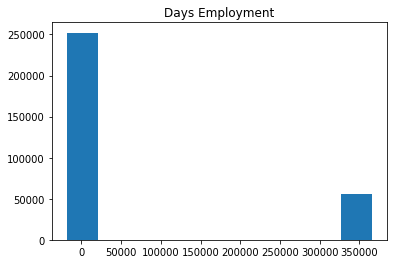

In [7]:
#观察数据发现DAYS_BIRTH（用户的出生日期）为负值，这是相对于贷款日期来进行计算的【即出生至贷款发生的日期】
#观察汇总内容没发现异常值
app_train['DAYS_BIRTH'].describe()


#观察DAYS_EMPLOYED字段，发现最大值为365243（1000年）出现异常
app_train['DAYS_EMPLOYED'].describe()

#绘制DAYS_EMPLOYED数据点分布直方图
plt.hist(app_train['DAYS_EMPLOYED'])
plt.title("Days Employment") 
plt.show()